In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spoof_data as spoof
import metrics as metric
import kalman_filter as kf

In [2]:
spoofer_ = spoof.SpoofData()
data, noisy_data, timestamps = spoofer_.run1()

In [3]:
state_cov_mat = (np.ones([3, 3]) - np.eye(3)) * -5000
meas_cov_mat = (np.ones([3, 3]) - np.eye(3)) * 5000
sys_noise_cov_mat = (np.ones([3, 3]) - np.eye(3)) * 5000

filter_ = kf.KalmanFilter(0, state_cov_mat, meas_cov_mat, sys_noise_cov_mat)
estimates = []

for i in range(len(timestamps)):
    estimate = filter_.estimate(timestamps[i],  noisy_data[i])
    estimates.append(estimate)


In [4]:
est_accs = []
real_accs = []
for i in range(len(estimates)):
  est_accs.append(estimates[i][0])
  real_accs.append(data[i][0])


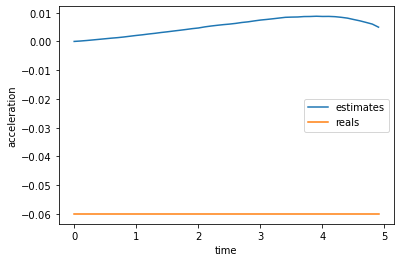

In [5]:
plt.plot(timestamps[0:50], est_accs[0:50], label="estimates")
plt.plot(timestamps[0:50], real_accs[0:50], label="reals")
plt.xlabel("time")
plt.ylabel("acceleration")
plt.legend()
plt.show()